# Training model with multiclass output classifier

In [3]:
# Step 1: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the trained model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# from google.colab import files
# uploaded = files.upload()

In [5]:
# Step 2: Load the dataset
file_path = "/content/finalcsv_withlabels.csv"
df = pd.read_csv(file_path)

In [6]:
# Step 3: Check for missing values
df = df.dropna()  # Drop rows with missing values
print(df.head(10))
print(df.shape)

  participant_id  laterality_index  color_vision_score  \
0   Nb4EetVPm3gs            -46.67                  14   
1   M09PXs7arQ5E              0.00                  14   
2   DgRP31gu21O9             94.47                  14   
3   ClMA0FwvFgLY             60.00                  14   
4   NVUkahaJ6fhf             73.34                  14   
5   u0JiZgdGuYvh             66.67                  14   
6   S6wKqEKnFGC4             31.13                  14   
7   FrjCLpmemRKk             76.67                  13   
8   9Znie6oQLkEM             50.00                  14   
9   ozh6v2FJ6R5o             86.67                  14   

   inconsistent_discipline_score  involvement_score  poor_supervision_score  \
0                             10                 35                      10   
1                             15                 40                      24   
2                             14                 27                      20   
3                             15             

## Step 4:
The participant_id column was converted into numerical values using Label Encoding, though it was not used as a feature in training.

In [7]:
# Step 4: Encode categorical variables
le = LabelEncoder()
df["participant_id"] = le.fit_transform(df["participant_id"])

## Step 5:

We loaded in labels from the data set (the column ADHD_Outcome)


In [8]:
# Step 5: Define features (X) and dummy target (y) for now
X = df.drop(columns=["participant_id"])  # Features: all numerical columns except ID
y = df["ADHD_Outcome"] # ADHD binary label

## Step 6:


1.   Here I used StandardScaler to scale all numerical features. This step ensures
that all features are on the same scale, preventing models from giving undue weight to larger values.
2.   Then split the data into 80% training and 20% testing using train_test_split() to evaluate the model's generalization performance.
3. trained a RandomForestClassifier



In [9]:
# Step 6: Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Step 7: Split into X and Y
# X_train = X_scaled
# y_train = y

# # Step 8: Train a Multi-Class Classifier (Random Forest)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train a Multi-Class Classifier (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 9: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6923076923076923
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.11      0.19        57
           1       0.69      0.99      0.81       112

    accuracy                           0.69       169
   macro avg       0.77      0.55      0.50       169
weighted avg       0.74      0.69      0.60       169



In [10]:
# Step 10: Save the trained model
joblib.dump(rf_model, "trained_model.pkl")
print("Model saved as trained_model.pkl")

Model saved as trained_model.pkl


<ipython-input-13-3c638eea90c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ADHD_Outcome', palette='Blues')


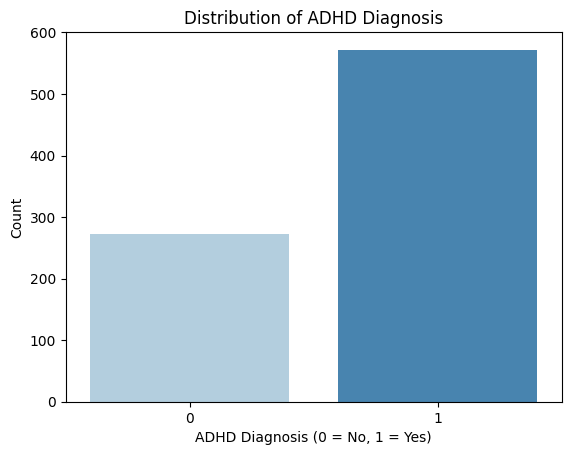

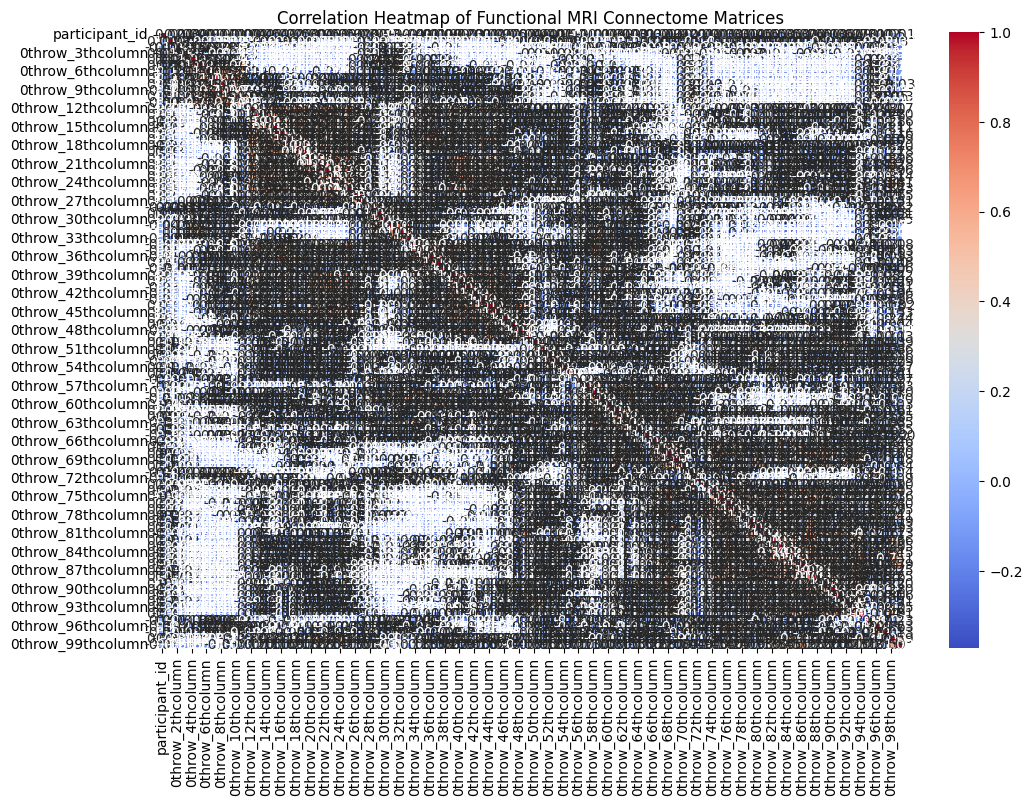

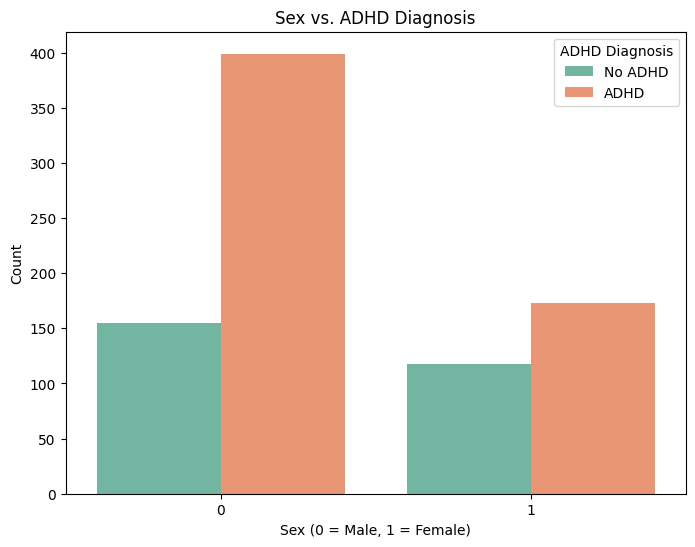

In [13]:
# Visualization
sns.countplot(data=df, x='ADHD_Outcome', palette='Blues')
plt.title('Distribution of ADHD Diagnosis')
plt.xlabel('ADHD Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

file_path = "/content/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
fMRI_df = pd.read_csv(file_path)
fMRI_df = fMRI_df.dropna(axis=1)
fMRI_subset = fMRI_df.iloc[:, :100]
fMRI_subset["participant_id"] = le.fit_transform(fMRI_subset["participant_id"])

# Compute the correlation matrix
correlation_matrix = fMRI_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Functional MRI Connectome Matrices')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex_F', hue='ADHD_Outcome', palette='Set2')
plt.title('Sex vs. ADHD Diagnosis')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='ADHD Diagnosis', labels=['No ADHD', 'ADHD'])
plt.show()

# Approach 2 (Optimized Model - Feature Selection + XGBoost)
## (not required but i just want to try to see if there is another way to improve)

In [14]:
# Install necessary libraries
!pip install xgboost

import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "/content/finalcsv_withlabels.csv"
df = pd.read_csv(file_path).dropna()

# Encode participant_id (optional)
le = LabelEncoder()
df["participant_id"] = le.fit_transform(df["participant_id"])

# Separate features and generate dummy target
X = df.drop(columns=["participant_id"])
y = df["ADHD_Outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into x & y
X_train = X_scaled
y_train = y

# Feature selection using Random Forest importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

# Select top 50 features
# Since MRI matrix columns might contain redundant information, we used Random Forest feature importance to select the top 50 most important features.
top_n = 50
important_features = np.argsort(feature_importance)[-top_n:]
X_train_selected = X_train[:, important_features]
X_test_selected = X_test[:, important_features]

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)   # more trees
xgb_model.fit(X_train_selected, y_train)

# Predict
y_pred = xgb_model.predict(X_test_selected)
print(y_pred)

[1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0]


accuracy dropped to 30.2%, which suggests the model still isn't learning well =((((

In [16]:
# Feature selection using Random Forest importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

# Select top 50 features
# Since MRI matrix columns might contain redundant information, we used Random Forest feature importance to select the top 50 most important features.
top_n = 50
important_features = np.argsort(feature_importance)[-top_n:]
X_train_selected = X_train[:, important_features]
X_test_selected = X_test[:, important_features]

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)   # more trees
xgb_model.fit(X_train_selected, y_train)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test_selected)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00       112

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169

